<a href="https://colab.research.google.com/github/fedhere/DSISymposium19/blob/master/DSIsymposiumLighteningTalks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [552]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [553]:
cd "drive/My Drive"

[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive


In [0]:
mkdir selectTalksDSIS2019

In [555]:
cd selectTalksDSIS2019 

/content/drive/My Drive/selectTalksDSIS2019


In [557]:
from google.colab import files

uploaded = files.upload()

Saving UDelDSISymposium2019submission.csv to UDelDSISymposium2019submission.csv


In [0]:
import io
import pandas as pd


df = pd.read_csv(io.BytesIO(uploaded['UDelDSISymposium2019submission.csv']))
# Dataset is now stored in a Pandas Dataframe

In [559]:
uploaded = files.upload()

Saving Names_2010Census.csv to Names_2010Census.csv


In [0]:
names = pd.read_csv(io.BytesIO(uploaded['Names_2010Census.csv']))


In [0]:
N=24

In [562]:
df.head(30)

,Timestamp,Email Address,Your Name,Application type,Your position,Your position.1,Preferred pronoun,Preferred pronoun.1,Preferred pronoun.2,Your department,Your department.1,Secondary department,Secondary department.1,Are you involved with the UD Data Science Institute,Unnamed: 14,Unnamed: 15,Unnamed: 16,Abstract,Abstract.1,Unnamed: 19,"If you are a student, name of your supervisor or mentor","Link to relevant publications from your research group that relate to your proposal (up to 2, optional)",Link to relevant publications that you authored/co-authored and that relate to your proposal (up to 2),Github account
0,9/23/2019 0:17:50,haobaiz@udel.edu,Haobai Zhang,Apply to give a talk or present a poster,NaN,PhD Student,she/her/hers,she/her/hers,NaN,"Education, School of (CEHD)","Education, School of (CEHD)",NaN,NaN,NaN,NaN,NaN,NaN,Practitioners of finite mixture models often h...,NaN,"Education, School of (CEHD)",Dr. Zachary Collier,NaN,NaN,614952797@qq.com
1,9/25/2019 16:56:36,sharmamenolin@gmail.com,Menolin,Apply to give a talk or present a poster,PhD Student,PhD Student,she/her/hers,she/her/hers,NaN,Agriculture and Natural Resources (CANR),Agriculture and Natural Resources (CANR),Plant & Soil Sciences (CANR),Plant & Soil Sciences (CANR),NaN,NaN,NaN,NaN,Bacteriophages are predicted to be the most nu...,NaN,Agriculture and Natural Resources (CANR),Shawn Polson,NaN,NaN,NaN
2,9/9/2019 10:56:58,jbuler@udel.edu,Jeff Buler,Apply to give a talk or present a poster,NaN,Faculty,he/him/his,he/him/his,he/him/his,Agriculture and Natural Resources (CANR),NaN,NaN,NaN,Affiliated Faculty,NaN,NaN,NaN,NaN,The USA network of weather surveillance radars...,Agriculture and Natural Resources (CANR),NaN,NaN,http://onlinelibrary.wiley.com/doi/10.1111/ele...,NaN
3,9/11/2019 14:13:36,abasht@udel.edu,Behnam Abasht,Apply to give a talk or present a poster,NaN,Faculty,he/him/his,he/him/his,he/him/his,Agriculture and Natural Resources (CANR),NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,Differential abundance of allelic transcripts ...,Agriculture and Natural Resources (CANR),NaN,NaN,https://www.nature.com/articles/s41598-017-121...,NaN
4,9/15/2019 21:03:53,jdums@udel.edu,Jacob Dums,Apply to give a talk or present a poster,NaN,Postdoc/Researcher,NaN,he/him/his,NaN,Agriculture and Natural Resources (CANR),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bacteriophage have been implicated as a major ...,NaN,Agriculture and Natural Resources (CANR),NaN,https://www.frontiersin.org/articles/10.3389/f...,NaN,NaN
5,9/11/2019 15:33:01,scabrera@udel.edu,Sergio Cabrera-Cruz,Apply to give a talk or present a poster,NaN,PhD Student,he/him/his,he/him/his,NaN,Agriculture and Natural Resources (CANR),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Urban areas affect terrestrial ecological proc...,NaN,Agriculture and Natural Resources (CANR),Jeffrey Buler,https://besjournals.onlinelibrary.wiley.com/do...,NaN,NaN
6,9/24/2019 10:54:11,scraig@udel.edu,Shani Craighead,Apply to give a talk or present a poster,NaN,PhD Student,she/her/hers,she/her/hers,NaN,Animal and Food Sciences (CANR),Animal and Food Sciences (CANR),NaN,NaN,NaN,NaN,NaN,NaN,Food safety policy relies on data-driven proac...,NaN,Animal and Food Sciences (CANR),Kali Kniel,NaN,NaN,NaN
7,9/25/2019 13:16:39,shenc@udel.edu,Cencheng Shen,Apply to give a talk or present a poster,NaN,Faculty,he/him/his,he/him/his,he/him/his,Applied Economics and Statistics (CANR),Applied Economics and Statistics (CANR),NaN,Mathematical Sciences (CAS),Resident Faculty,NaN,NaN,NaN,NaN,Understanding and developing a correlation mea...,Applied Economics and Statistics (CANR),NaN,NaN,https://www.tandfonline.com/doi/abs/10.1080/01...,NaN
8,9/25/2019 20:47:28,cyxu@udel.edu,Chaoyi Xu,Apply to give a talk or present a poster,NaN,PhD Student,he/him/his,he/him/his,NaN,Arts & Science (CAS),Arts & Science (CAS),NaN,Chemistry & Biochemistry (CAS),NaN,NaN,NaN,NaN,Cryo-electron microscopy (CryoEM) has become a...,NaN,Arts & Science (CAS),Juan Perilla,NaN,NaN,cyxu2017@gmail.com
9,9/25/2019 15:42:58,qamar@ude

In [0]:
df.dropna(subset=['Abstract'], inplace=True)
df.shape

In [0]:
df.head()

In [0]:
df['Your position'].unique()

In [0]:
df['Your position.1'].unique()

In [0]:
df['position'] = df['Your position'].fillna(value=df['Your position.1'])

In [0]:
df['Your department'].isna().sum()

In [0]:
df['Your department.1'].isna().sum()

In [0]:
df['department'] = df['Your department'].fillna(value=df['Your department.1'])

In [0]:
df['department'].fillna(value='Other', inplace=True)

In [0]:
df['gender'] = df['Preferred pronoun'].fillna(
    value=df['Preferred pronoun.1']).map({"she/her/hers":"F",
                                         "he/him/his":"M",
                                         "they/them/theirs":"NB"})

In [0]:
df['supervisor'] = df['If you are a student, name of your supervisor or mentor ']


In [0]:
df = df[['Your Name', 'Email Address', 'department',
        'position', 'gender', 'supervisor', 'Abstract']]
df.head(50)

In [0]:
df.loc[36, 'department'] = df.loc[69, 'department']
df.loc[70, 'department'] = df.loc[69, 'department']
df.loc[4, 'supervisor'] = df.loc[1, 'supervisor']
df.head(50)

In [0]:
df['supervisor'] = df['supervisor'].map(lambda x:x.replace('Dr. ','').replace(
    'Dr ','').replace('Dr.','').replace(", PhD", 
                                        "").replace('Juan R. Perilla',
                               'Juan Perilla').replace('K Eric Wommack', 
                                             'K. Eric Wommack'))
df['supervisor'].fillna(value='', inplace=True)


In [0]:
df.loc[35, 'Abstract'] = "Latent class analysis (LCA) and latent profile analysis (LPA) are finite mixture models widely used among social and behavioral scientists. While both models are used to identify meaningful subgroups in cross-sectional analyses, LCA detects patterns in categorical observed variables, whereas LPA detects subgroups in continuous observed variables. Recent examples of LCA and LPA applications include identifying post-traumatic stress disorder patterns and predictors among refugees, and splitting latent classes into trees and relating them to external variables (Minihan, 2018; Van Den Bergh & Vermunt, 2019). Mplus (Muthen & Muthen, 2017) is a latent variable modeling program, widely used for running statistical analyses and mixture models such as LCA and LPA. However, because Mplus uses a one-input one-output approach, the program can only run one model at a time. In instances such as LPA or LCA, where researchers must run and compare output from several models at a time, analyses can be burdensome and time consuming. The Mplus Automation package in R (Hallquist & Wiley, 2018) was created to automate processes and decrease some of the burden associated with running large batches of models in Mplus. The package can reduce the effort required to conduct LCA/LPA analyses by automating the process of creating Mplus syntax, running batches of models, and creating tables to compare the output from each model. However, as this package was recently created, there are few researchers familiar with its’ use and little online guidance for researchers looking to try the package. This poster aims to familiarize the audience with the Mplus Automation package by presenting an example of how the package can be used to facilitate LCA/LPA analyses. Using example data to conduct an LPA, the poster will display syntax, output, and results showing the use of the Mplus Automation package, as well as links to further resources and examples. Through this example, the author hopes to convey the benefits of using the Mplus Automation package and help researchers discover and use the package. "

In [0]:
df.replace('Chemistry & Biochemistry (CAS)', 
           "Chemestry and Biochemestry (CAS)", inplace=True)

In [424]:
df.department.unique()

array(['Education, School of    (CEHD)',
       'Agriculture and Natural Resources   (CANR)',
       'Animal and Food Sciences   (CANR)', 'Arts & Science   (CAS)',
       'Behavioral Health and Nutrition   (CHS)',
       'Bioinformatics and Systems Biology (CBCB)', 'Biology   (CAS)',
       'Chemestry and Biochemestry (CAS)',
       'Computer & Information Sciences   (EG)',
       'Department of Electrical and Computer Engineering (EG)',
       'Department of Entomology and Wildlife Ecology  (CANR)',
       'Department of Human Development and Family Sciences (CEHD)',
       'Physics & Astronomy   (CAS)',
       'Dept. of Plant and Soil Sciences  (CANR)',
       'Electrical Engineering   (EG)', 'Geography   (CEOE)',
       'Graduate Interdisciplinary Program', 'Marine Science   (CEOE)',
       'Mathematical Sciences   (CAS)', 'Other',
       'Plant & Soil Sciences   (CANR)',
       'Public Policy& Administration   (CAS) (Biden school)'],
      dtype=object)

In [0]:
import numpy as np
n = len(df)

In [426]:
dpdept = 1.0 / df.groupby('department').count()['Abstract'] 
dpgender = 1.0 / df.groupby('gender').count()['Abstract'] 
dpposition = 1.0 / df.groupby('position').count()['Abstract']
dpsupervisor = 1.0 / df.groupby('supervisor').count()['Abstract']
dpdept#, dpgender, dpposition

department
Agriculture and Natural Resources   (CANR)                    0.333333
Animal and Food Sciences   (CANR)                             1.000000
Arts & Science   (CAS)                                        0.500000
Behavioral Health and Nutrition   (CHS)                       1.000000
Bioinformatics and Systems Biology (CBCB)                     0.333333
Biology   (CAS)                                               1.000000
Chemestry and Biochemestry (CAS)                              0.500000
Computer & Information Sciences   (EG)                        0.125000
Department of Electrical and Computer Engineering (EG)        0.333333
Department of Entomology and Wildlife Ecology  (CANR)         1.000000
Department of Human Development and Family Sciences (CEHD)    1.000000
Dept. of Plant and Soil Sciences  (CANR)                      1.000000
Education, School of    (CEHD)                                1.000000
Electrical Engineering   (EG)                                 1.00

In [427]:
dpgender

gender
F     0.050000
M     0.032258
NB    0.333333
Name: Abstract, dtype: float64

In [428]:
dpposition

position
Adjunct Faculty, USDA scientist, Stationed on Campus    1.000000
Graduate Certificate                                    1.000000
Master Student                                          0.125000
PhD Student                                             0.028571
Postdoc/Researcher                                      0.333333
Undergraduate Student                                   0.166667
Name: Abstract, dtype: float64

In [319]:
names.head()

,name,rank,count,prop100k,cum_prop100k,pctwhite,pctblack,pctapi,pctaian,pct2prace,pcthispanic,eth
0,SMITH,1,2442977,828.19,828.19,70.90,23.11,0.50,0.89,2.19,2.40,pctwhite
1,JOHNSON,2,1932812,655.24,1483.42,58.97,34.63,0.54,0.94,2.56,2.36,pctwhite
2,WILLIAMS,3,1625252,550.97,2034.39,45.75,47.68,0.46,0.82,2.81,2.49,pctblack
3,BROWN,4,1437026,487.16,2521.56,57.95,35.60,0.51,0.87,2.55,2.52,pctwhite
4,JONES,5,1425470,483.24,3004.80,55.19,38.48,0.44,1.00,2.61,2.29,pctwhite


In [0]:
for c in ["pctwhite","pctblack","pctapi", "pctaian","pct2prace","pcthispanic"]:
  names[c] = pd.to_numeric(names[c], errors='coerce')

In [0]:
names['eth'] = [names.iloc[i][names.iloc[i]==v].index[0] for i,v in enumerate(names[["pctwhite","pctblack","pctapi",
                                                     "pctaian","pct2prace","pcthispanic"]].max(axis=1).values)]


In [0]:
names[names['name'] == 'DOYLE']['eth'].values[0]

In [0]:
df['eth'] = [names[names['name'] == n]['eth'].values[0][3:] 
 if len(names[names['name'] == n]['eth']) > 0 
   else 'any'
 for n in df['Your Name'].map(lambda x: x.split()[-1].upper())
  ]

In [430]:
df.loc[70, 'eth'] = 'black'
df.head(70)

,Your Name,Email Address,department,position,gender,supervisor,Abstract,eth,weights
0,Haobai Zhang,haobaiz@udel.edu,"Education, School of (CEHD)",PhD Student,F,Zachary Collier,Practitioners of finite mixture models often h...,api,0.013743
1,Menolin,sharmamenolin@gmail.com,Agriculture and Natural Resources (CANR),PhD Student,F,Shawn Polson,Bacteriophages are predicted to be the most nu...,any,0.001283
4,Jacob Dums,jdums@udel.edu,Agriculture and Natural Resources (CANR),Postdoc/Researcher,M,Shawn Polson,Bacteriophage have been implicated as a major ...,white,0.001277
5,Sergio Cabrera-Cruz,scabrera@udel.edu,Agriculture and Natural Resources (CANR),PhD Student,M,Jeffrey Buler,Urban areas affect terrestrial ecological proc...,any,0.007450
6,Shani Craighead,scraig@udel.edu,Animal and Food Sciences (CANR),PhD Student,F,Kali Kniel,Food safety policy relies on data-driven proac...,white,0.013743
8,Chaoyi Xu,cyxu@udel.edu,Arts & Science (CAS),PhD Student,M,Juan Perilla,Cryo-electron microscopy (CryoEM) has become a...,api,0.000246
9,Farid Qamar,qamar@udel.edu,Arts & Science (CAS),Master Student,M,Gregory Dobler,There is a growing need to develop a better un...,api,0.002424
10,Elizabeth Smith,smithem@udel.edu,Behavioral Health and Nutrition (CHS),Master Student,F,Rodrigo Vargas,An environmental correlation approach was perf...,white,0.006681
11,Ryan Moore,moorer@udel.edu,Bioinformatics and Systems Biology (CBCB),PhD Student,M,K. Eric Wommack,Inteins are mobile genetic elements found with...,white,0.000109
12,Zach Schreiber,zschreib@udel.edu,Bioinformatics and Systems Biology (CBCB),PhD Student,M,Shawn Polson,This project aims to shed light on what unclas...,white,0.000109


In [431]:
dpeth = 1.0 / df.groupby('eth').count()['Abstract']
dpeth

eth
any         0.125000
api         0.045455
black       1.000000
hispanic    1.000000
white       0.045455
Name: Abstract, dtype: float64

In [432]:
df.groupby('supervisor').count()

,Your Name,Email Address,department,position,gender,Abstract,eth,weights
supervisor,,,,,,,,
,3,3,3,3,3,3,3,3
Art Trembanis,1,1,1,1,1,1,1,1
Cathy Wu,1,1,1,1,1,1,1,1
Chandra Kambhamettu,1,1,1,1,1,1,1,1
Chase Cotton,1,1,1,1,1,1,1,1
Christine Skubisz,1,1,1,1,1,1,1,1
Claudine Jurkovitz,1,1,1,1,1,1,1,1
"Dana E. Veron, Ph.D. (Geography Dept.)",1,1,1,1,1,1,1,1
Federica Bianco,1,1,1,1,1,1,1,1


In [324]:
((dpsupervisor.loc[df['supervisor'].values].values)**0.25)

array([1.        , 0.75983569, 0.75983569, 1.        , 1.        ,
       0.75983569, 0.84089642, 0.75983569, 0.75983569, 0.75983569,
       1.        , 0.75983569, 0.75983569, 0.75983569, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.84089642, 0.84089642,
       0.75983569, 1.        , 1.        , 0.75983569, 1.        ,
       0.84089642, 0.84089642, 1.        , 0.84089642, 1.        ,
       1.        , 0.84089642, 1.        , 0.75983569, 1.        ,
       1.        , 1.        , 1.        , 0.75983569, 0.75983569,
       1.        , 1.        , 0.75983569, 0.75983569, 0.75983569,
       0.84089642, 1.        , 0.75983569, 1.        ])

In [433]:
df['eth'].fillna(value='', inplace=True)
((dpeth.loc[df['eth'].values].values)**0.25)

array([0.46173663, 0.59460356, 0.46173663, 0.59460356, 0.46173663,
       0.46173663, 0.46173663, 0.46173663, 0.46173663, 0.46173663,
       0.46173663, 0.46173663, 0.46173663, 0.59460356, 0.59460356,
       0.46173663, 0.46173663, 0.46173663, 0.46173663, 0.46173663,
       0.46173663, 0.59460356, 0.46173663, 0.46173663, 0.46173663,
       0.59460356, 0.46173663, 0.46173663, 1.        , 0.46173663,
       0.46173663, 0.46173663, 0.46173663, 0.46173663, 0.46173663,
       0.46173663, 0.46173663, 0.46173663, 0.46173663, 0.46173663,
       0.46173663, 0.46173663, 0.46173663, 0.46173663, 0.59460356,
       0.46173663, 0.46173663, 0.59460356, 1.        , 0.46173663,
       0.46173663, 0.46173663, 0.46173663, 0.46173663])

In [0]:
df['weights'] = dpsupervisor.loc[df['supervisor'].values].values**2
df['weights'].fillna(value=df.weights.mean(), inplace=True)
df['weights'] *= dpgender.loc[df['gender'].values].values
df['weights'] *= dpposition.loc[df['position'].values].values
df['weights'] *= (dpdept.loc[df['department'].values].values)**2
df['weights'] *= dpeth.loc[df['eth'].values].values**2
#df['weights'] *= 
#


In [0]:
df['weights'] /= df['weights'].sum()

In [436]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
corpus = df['Abstract']
 
X_train_counts = count_vect.fit_transform(corpus)
 
pd.DataFrame(X_train_counts.toarray(),
             columns=count_vect.get_feature_names(),
             index=df.index)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)

pd.DataFrame(trsfm.toarray(),
             columns=vectorizer.get_feature_names(),
             index=df.index)
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.09528911, 0.08742566, 0.07455711, 0.06849122,
        0.09360079, 0.09246297, 0.10551354, 0.10016311, 0.06292924,
        0.04916863, 0.07542137, 0.06931689, 0.06039741, 0.08936492,
        0.08392655, 0.09872609, 0.14412644, 0.08055684, 0.0476894 ,
        0.11629636, 0.12545876, 0.07728073, 0.10489145, 0.05753569,
        0.06116214, 0.25781144, 0.05326288, 0.10040226, 0.08675129,
        0.08778734, 0.06914643, 0.09841936, 0.06867803, 0.12291703,
        0.09161317, 0.09442795, 0.06626578, 0.06964538, 0.07743569,
        0.08168662, 0.06145855, 0.07884284, 0.07204806, 0.0710421 ,
        0.07301418, 0.06973232, 0.10407042, 0.04622172, 0.05699226,
        0.08027083, 0.07928346, 0.08777766, 0.07749402]])

In [540]:
#222
np.random.seed(245678)
def runsim (df):
  emails = np.random.choice(df['Email Address'], 
                            replace=False, size=N, 
                            p = df['weights'].values)
  return df[np.array([df['Email Address'].values == e for e in emails]).sum(axis=0).astype(bool)]


selected = runsim(df)
gendergp = selected.groupby("gender").count()
while (not 'NB' in gendergp.index) or\
  gendergp.loc["NB", "department"] < 2 or\
  gendergp.loc["F", "department"] < 8:
  selected = runsim(df)
  gendergp = selected.groupby("gender").count()
  '''
  print(selected['Abstract'])
  for i in range(N):
    for j in range(N):
      
      if not i==j:
        print(i,j,cosine_similarity(trsfm[i:i+1], trsfm)[0,j])
   ''' 
selected.groupby("department").count() 

,Your Name,Email Address,position,gender,supervisor,Abstract,eth,weights
department,,,,,,,,
Agriculture and Natural Resources (CANR),2,2,2,2,2,2,2,2
Animal and Food Sciences (CANR),1,1,1,1,1,1,1,1
Arts & Science (CAS),1,1,1,1,1,1,1,1
Behavioral Health and Nutrition (CHS),1,1,1,1,1,1,1,1
Bioinformatics and Systems Biology (CBCB),1,1,1,1,1,1,1,1
Chemestry and Biochemestry (CAS),1,1,1,1,1,1,1,1
Computer & Information Sciences (EG),2,2,2,2,2,2,2,2
Department of Electrical and Computer Engineering (EG),1,1,1,1,1,1,1,1
Department of Entomology and Wildlife Ecology (CANR),1,1,1,1,1,1,1,1


In [541]:
gendergp

,Your Name,Email Address,department,position,supervisor,Abstract,eth,weights
gender,,,,,,,,
F,11,11,11,11,11,11,11,11
M,10,10,10,10,10,10,10,10
NB,3,3,3,3,3,3,3,3


In [542]:
selected.groupby("position").count()

,Your Name,Email Address,department,gender,supervisor,Abstract,eth,weights
position,,,,,,,,
"Adjunct Faculty, USDA scientist, Stationed on Campus",1,1,1,1,1,1,1,1
Graduate Certificate,1,1,1,1,1,1,1,1
Master Student,4,4,4,4,4,4,4,4
PhD Student,14,14,14,14,14,14,14,14
Undergraduate Student,4,4,4,4,4,4,4,4


In [543]:
selected.groupby("eth").count()

,Your Name,Email Address,department,position,gender,supervisor,Abstract,weights
eth,,,,,,,,
any,6,6,6,6,6,6,6,6
api,8,8,8,8,8,8,8,8
black,1,1,1,1,1,1,1,1
hispanic,1,1,1,1,1,1,1,1
white,8,8,8,8,8,8,8,8


In [544]:

selected

,Your Name,Email Address,department,position,gender,supervisor,Abstract,eth,weights
0,Haobai Zhang,haobaiz@udel.edu,"Education, School of (CEHD)",PhD Student,F,Zachary Collier,Practitioners of finite mixture models often h...,api,0.013743
1,Menolin,sharmamenolin@gmail.com,Agriculture and Natural Resources (CANR),PhD Student,F,Shawn Polson,Bacteriophages are predicted to be the most nu...,any,0.001283
5,Sergio Cabrera-Cruz,scabrera@udel.edu,Agriculture and Natural Resources (CANR),PhD Student,M,Jeffrey Buler,Urban areas affect terrestrial ecological proc...,any,0.007450
6,Shani Craighead,scraig@udel.edu,Animal and Food Sciences (CANR),PhD Student,F,Kali Kniel,Food safety policy relies on data-driven proac...,white,0.013743
9,Farid Qamar,qamar@udel.edu,Arts & Science (CAS),Master Student,M,Gregory Dobler,There is a growing need to develop a better un...,api,0.002424
10,Elizabeth Smith,smithem@udel.edu,Behavioral Health and Nutrition (CHS),Master Student,F,Rodrigo Vargas,An environmental correlation approach was perf...,white,0.006681
13,Rita Rawal,rita@udel.edu,Bioinformatics and Systems Biology (CBCB),PhD Student,F,Marie Kuczmarski,Dietary diversity (DD) is recognized key compo...,api,0.001527
17,Tanya Nesterova,tanyanes@udel.edu,Chemestry and Biochemestry (CAS),Undergraduate Student,F,Juan Perilla,"The human immunodeficiency virus, or HIV, caus...",any,0.016841
21,Sachin Gavali,saching@udel.edu,Computer & Information Sciences (EG),PhD Student,M,Cathy Wu,As a part of Delaware’s effort to improve heal...,any,0.001048
23,Peng Su,psu@udel.edu,Computer & Information Sciences (EG),PhD Student,NB,Vijay Shanker,Significant progress has been made in applying...,api,0.001432


In [545]:
for a in selected.Abstract:
  print(a)
  print("\n")

Practitioners of finite mixture models often have difficulty selecting the correct number of classes due to conflicting fit indices. Recent empirical and simulation studies advised cross validation as an alternative way to measure the accuracy of class enumeration with growth mixture models, because it iteratively tests models while controlling for Type I error rate. Such studies are limited to hold-out and k-fold cross validation and conversely suggests that the k-fold approach only performs well when classes have large separation. Our current project expands this area of research to four types of class enumeration methods: k-fold, leave-out-one, hold out, and bootstrap. We also compare the performance of cross validation and bootstrap methods on two mixture models, latent class and latent profile analyses (LCA and LPA).


Bacteriophages are predicted to be the most numerous biological organisms on earth. Yet, tracking their diversity is difficult due to a lack of marker gene in phage

In [546]:
selected.rename({'eth': 'ethnicity'}, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [548]:
columns = selected.loc[0].index.values[:-1]
columns

array(['Your Name', 'Email Address', 'department', 'position', 'gender',
       'supervisor', 'Abstract', 'ethnicity'], dtype=object)

In [0]:
selected = selected.replace('api','Asian or Pacific Islinder')
selected = selected.replace('any','Unknown')


In [0]:
fout = open("selectedLighteningTalks.txt", "w")
fout.write("find the notebook that generated this selection at:")
fout.write("https://colab.research.google.com/gist/fedhere/3984ebc1572e67199e971a9f24a3b8ec/dsisymposiumlighteningtalks.ipynb?authuser=1#scrollTo=RlA6Bmpy5_1J\n\n\n")

for i in selected.index:
  for j in columns:
    fout.write(j + ": " + selected.loc[i, j] + "\n")
  fout.write("\n\n\n\n\n\n")
fout.close()

In [0]:
from google.colab import files
files.download('selectedLighteningTalks.txt') 

In [0]:
selected.to_csv("selectedLighteningTalks.csv")

In [0]:
from google.colab import files
files.download('selectedLighteningTalks.csv') 

In [492]:
!git clone https://github.com/amueller/word_cloud.git
!cd word_cloud


fatal: destination path 'word_cloud' already exists and is not an empty directory.


In [494]:
cd word_cloud/

/content/word_cloud


In [495]:
!pip install .

Processing /content/word_cloud
  Created wheel for wordcloud: filename=wordcloud-1.5.0.post41+g32f5d2a-cp36-cp36m-linux_x86_64.whl size=335582 sha256=f521206992c4b770dd9a523dc6e8e0a0f374d512af89c19a5f1fdc3780d6f396
  Stored in directory: /tmp/pip-ephem-wheel-cache-6z_ia1oh/wheels/c9/9e/fe/b14c026a2af072dcf59543bce68dcdfff8a5362e6bb11242d9
Successfully built wordcloud
  Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0


In [497]:
cd ../

/content


In [0]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [568]:
!ls

alleneaATudel.edu.png	pinarselATudel.edu.png
arshiyakATudel.edu.png	psuATudel.edu.png
driserATudel.edu.png	qamarATudel.edu.png
guoxinATudel.edu.png	ritaATudel.edu.png
haobaizATudel.edu.png	sachingATudel.edu.png
hdsmithATudel.edu.png	scabreraATudel.edu.png
hzhangATudel.edu.png	scraigATudel.edu.png
jldoyleATudel.edu.png	sharmamenolinATgmail.com.png
ksubediATudel.edu.png	smithemATudel.edu.png
mguevaraATudel.edu.png	sseadrowATudel.edu.png
mlundineATudel.edu.png	tanyanesATudel.edu.png
muellercATudel.edu.png	UDelDSISymposium2019submission.csv
Names_2010Census.csv	vdamicoATudel.edu.png


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/bin/bash: line 0: cd: /drive/My Drive: No such file or directory


In [563]:
ls

Names_2010Census.csv  UDelDSISymposium2019submission.csv


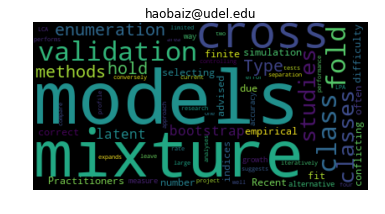

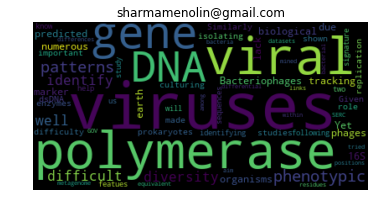

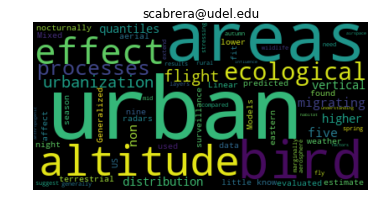

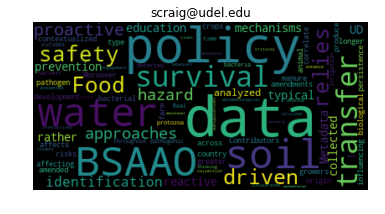

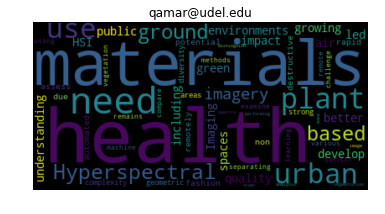

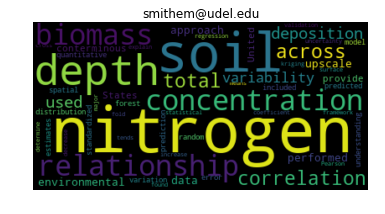

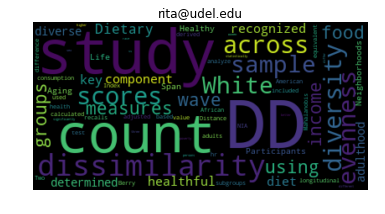

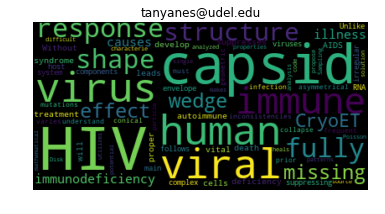

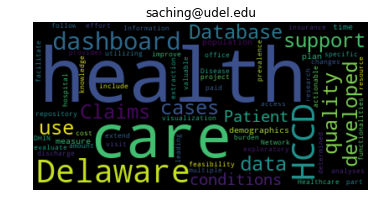

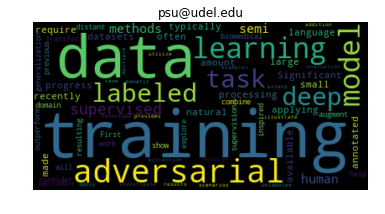

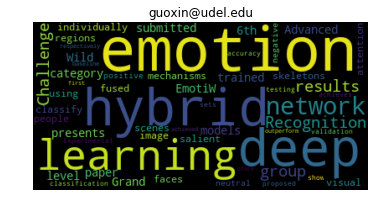

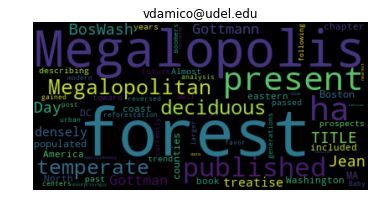

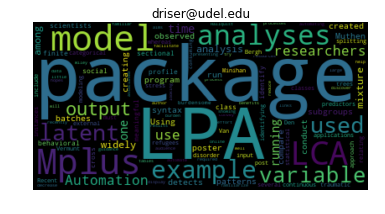

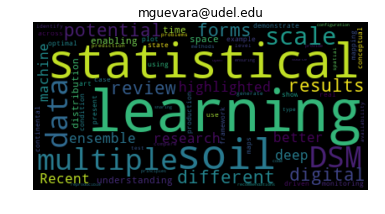

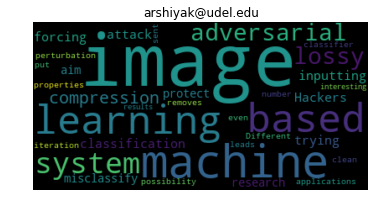

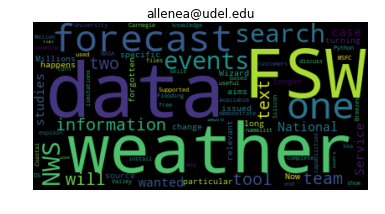

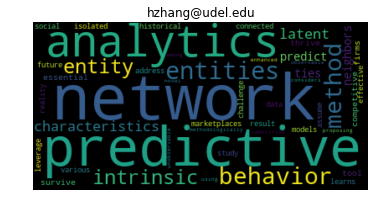

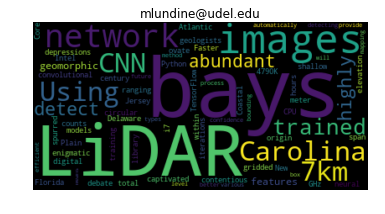

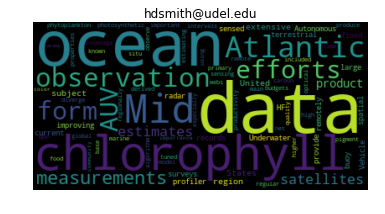

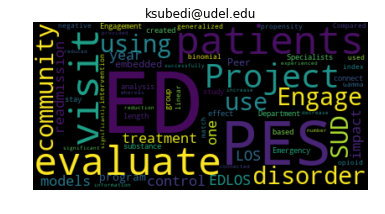

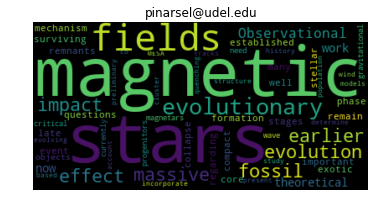

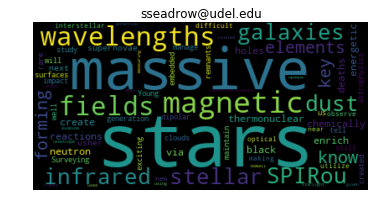

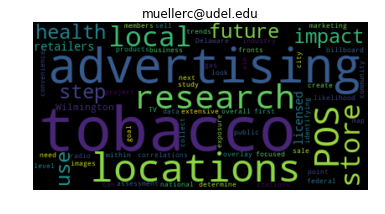

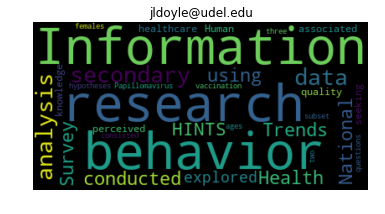

In [564]:
for i in range(len(selected)):
  # Start with one review:
  text = selected.Abstract.values[i]

  # Create and generate a word cloud image:
  wordcloud = WordCloud().generate(text)

  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(selected['Email Address'].values[i])
  plt.axis("off")
  plt.show()

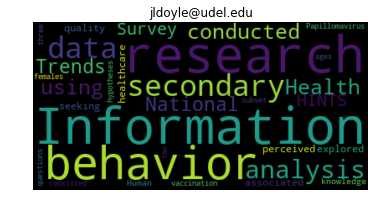

In [565]:
for i in range(len(selected)):
  # Start with one review:
  text = selected.Abstract.values[i]

  # Create and generate a word cloud image:
  wordcloud = WordCloud().generate(text)

  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(selected['Email Address'].values[i])
  plt.axis("off")
 
  plt.savefig(selected['Email Address'].values[i].replace("@", "AT")+".png")


In [0]:

for i in range(len(selected)):
  files.download(selected['Email Address'].values[i].replace("@", "AT")+".png") 